# О возникновении силы тяги в системе вращающихся зарядов

In [1]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc,
                long double R, long double omega, long double alpha)
    
    long double tlag_test(long double x, long double y, long double z, long double t1, long double t2, 
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
               long double xc, long double yc, long double zc,
               long double R, long double omega, long double alpha)

    # отношение радиуса Лиенара Вихерта к радиусу
    long double klw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    # Радиус Лиенара Вихерта
    long double Rlw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    long double philw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
             long double q,
             long double * A_x, long double * A_y, long double * A_z,
             long double xc, long double yc, long double zc, long double R, long double omega, long double alpha
           )
    
    void electr_magnet(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double * E_x, long double * E_y, long double * E_z, long double * B_x, long double * B_y, long double * B_z,
                       long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)

    void cset_c(long double _c)
    void cset_timespan_Epsilon(long double _eps)
    long double cget_c()
    long double cget_timespan_Epsilon()

#sgs 
import numpy as np
cdef long double c# = np.float128(1)
cdef long double timespan_Epsilon = np.float128(1.0e-8)

#cdef long double R_r = np.float128(1)
#cdef long double R_l = np.float128(1)
#cdef long double S = np.float128(0.005)

cdef long double R_r = np.float128(10)
cdef long double R_l = np.float128(10)
cdef long double S = np.float128(0.5)

# centers of circles
cr = ( S/2+R_r, np.float128(0), np.float128(0))
cl = (-S/2-R_l, np.float128(0), np.float128(0))

cdef long double xc_l = cl[0]
cdef long double xc_r = cr[0]

cdef long double yc_l = cl[1]
cdef long double yc_r = cr[1]

cdef long double zc_l = cl[2]
cdef long double zc_r = cr[2]

cdef long double sx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = xc + R*np.cos(current_angle)
    return result
cdef long double sy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = yc + R*np.sin(current_angle)
    return result
cdef long double sz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    result = zc
    return result

cdef long double vx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = -omega*R*np.sin(current_angle)
    return result
cdef long double vy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = omega*R*np.cos(current_angle)
    return result
cdef long double vz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    result = 0
    return result


cdef long double wx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    cdef long double current_angle = omega * t + alpha
    result = -omega*omega*R*np.cos(current_angle)
    return result
cdef long double wy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.sin(current_angle)
    return result
cdef long double wz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha):
    cdef long double result
    result = 0
    return result

def R_lw(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t

    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))

    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    cdef long double r_lw = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, Xc, Yc, Zc, Rc, Omega, Alpha)

    return r_lw

def phi_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t

    cdef long double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha

    cdef long double philw_ = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_, Xc, Yc, Zc, Rc, Omega, Alpha)

    return philw_


def A_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q_ = q
    
    cdef long double A_x
    cdef long double A_y
    cdef long double A_z
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha

    Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_,
                  &A_x, &A_y, &A_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (A_x, A_y, A_z)

def EB_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q_ = q
    
    cdef long double E_x
    cdef long double E_y
    cdef long double E_z
    cdef long double B_x
    cdef long double B_y
    cdef long double B_z
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_,
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (E_x, E_y, E_z, B_x, B_y, B_z)

def t_lag(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    cdef long double q = 1
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    cdef long double lag = tlag(Xa, Ya, Za, ta,
                           sx, sy, sz, vx, vy, vz,
                           Xc, Yc, Zc, Rc, Omega, Alpha)
    return lag


def t_lag_test(x, y, z, t1, t2, xc, yc, zc, R, omega, alpha):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t1
    cdef long double tq = t2
    cdef long double q = 1
    
    cdef long double Xc = xc
    cdef long double Yc = yc
    cdef long double Zc = zc
    cdef long double Rc = R
    cdef long double Omega = omega
    cdef long double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    cdef long double tst = tlag_test(Xa, Ya, Za, ta, tq,
                                sx, sy, sz,
                                Xc, Yc, Zc, Rc, Omega, Alpha)
    return tst



def calc_sum_Fy_t(N, S, R_l, R_r, t_i,
                  omega,
                  alpha0_l = np.float128(0),
                  alpha0_r = np.float128(0),
                  to_animate = False,
                  to_log = False):
    
    cdef int n = N
    cdef long double sign_a
    cdef long double sign_q
    
    cdef long double Alpha_l
    cdef long double Alpha_r
    
    cdef long double current_angle_l
    cdef long double current_angle_r
    
    cdef long double Omega_l = + omega
    cdef long double Omega_r = - omega
    
    cdef long double Xa, Ya, Za
    cdef long double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef long double Fx_l = 0.0
    cdef long double Fy_l = 0.0
    cdef long double Fx_r = 0.0
    cdef long double Fy_r = 0.0
    cdef long double F_alpha_l = 0.0
    cdef long double F_alpha_r = 0.0
    
    #F_alpha_l = []
    #F_alpha_r = []
    frames = []

    for i_a in range(n):
        for i_q in range(n):
            if to_animate:
                from sage.plot.all import Graphics
                p = Graphics()
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            if to_animate:
                if sign_a > 0:
                    color_a = "red"
                else:
                    color_a = "blue"
                if sign_q > 0:
                    color_q = "red"
                else:
                    color_q = "blue"
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            Xa = sx(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Xq = sx(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Ya = sy(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Yq = sy(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Za = sz(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Zq = sz(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            if to_animate:
                from sage.plot.circle import circle
                from sage.plot.line import line
                p += circle((cr[0],cr[1]), R_r)
                p += circle((cl[0],cl[1]), R_l)
                p += line ([(cr[0],cr[1]), (Xq, Yq)], color = color_q, linestyle="solid")
                p += line ([(cl[0],cl[1]), (Xa, Ya)], color = color_a, linestyle="solid")
                
                # время запаздывания поля правого заряда в области левого заряда
                t2_a = t_lag(Xa, Ya, Za, t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                t2_a_test = t_lag_test(Xa, Ya, Za, t_i, t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                # запаздывающая координата правого заряда в момент прихода его поля в область левого заряда
                X2_q = sx(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                Y2_q = sy(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                
                # время запаздывания поля левого заряда в области правого заряда
                t2_q = t_lag(Xq, Yq, Zq, t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                t2_q_test = t_lag_test(Xq, Yq, Zq, t_i, t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                # запаздывающая координата левого заряда в момент прихода его поля в область правого заряда
                X2_a = sx(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                Y2_a = sy(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                
                if (to_log):
                    print("t_i=%f t2_a=%f t2_q=%f t2_a*omega/2pi=%f t2_q*omega/2pi=%f" % \
                          (t_i, t2_a, t2_q, t2_a*omega/(2*np.pi), t2_q*omega/(2*np.pi)))
                    print("t_i-t2_a=%f" % \
                          (t_i-t2_a))
                    print("t2_a_test=%f t2_q_test=%f" % (t2_a_test, t2_q_test))
            
            # поле создаваемое правым вращающимся зарядом в области левого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            # сила действующая на левый заряд со стороны поля правого заряда
            fx_l = (E_x)*sign_a
            fy_l = (E_y)*sign_a

            Fx_l += fx_l
            Fy_l += fy_l
            
            current_angle_l = Omega_l * t_i + Alpha_l
            
            # Расчёт углового усилия действующего на левый заряд со стороны поля правого заряда
            f_alpha_l  = fy_l * np.cos(current_angle_l) - fx_l * np.sin(current_angle_l)
            F_alpha_l += f_alpha_l
            
            # поле создаваемое левым вращающимся зарядом в области правого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xq, Yq, Zq, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            # сила действующая на правый заряд со стороны поля левого заряда
            fx_r = (E_x)*sign_q
            fy_r = (E_y)*sign_q
            
            Fx_r += fx_r
            Fy_r += fy_r
            
            current_angle_r = Omega_r * t_i + Alpha_r
            
            # Расчёт углового усилия действующего на правый заряд со стороны поля левого заряда
            f_alpha_r  = fy_r * np.cos(current_angle_r) - fx_r * np.sin(current_angle_r)
            F_alpha_r += f_alpha_r
            
            if to_animate:
                p += line ([(Xq, Yq), (X2_a, Y2_a)], color = "green", linestyle="dashed")
                p += line ([(X2_q, Y2_q), (Xa, Ya)], color = "green", linestyle="dashed")
                p += line ([(cr[0],cr[1]), (X2_q, Y2_q)], color = color_q, linestyle="dashed")
                p += line ([(cl[0],cl[1]), (X2_a, Y2_a)], color = color_a, linestyle="dashed")

            if to_log:
                print("fx_l=%f fy_l=%f fx_r=%f fy_r=%f" % (fx_l, fy_l, fx_r, fy_r))
            if to_animate:
                p.show(aspect_ratio = 1)
                frames += [p]

    # Интегральная величина тяги в направлении оси y
    # угловое усилие

    return Fy_l + Fy_r, F_alpha_l, F_alpha_r

def calc_Maxwells_stress_tensor(X_a, Y_a, Z_a, t_i, N, S, R_l, R_r,
                                cos_nx, cos_ny, cos_nz,
                                omega,
                                alpha0_l = np.float128(0),
                                alpha0_r = np.float128(0)
                               ):
    
    cdef int n = N
    cdef long double sign_a
    cdef long double sign_q
    
    cdef long double Alpha_l
    cdef long double Alpha_r
    
    cdef long double Omega_l = + omega
    cdef long double Omega_r = - omega
    
    cdef long double Xa, Ya, Za
    cdef long double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef long double Ex = 0
    cdef long double Ey = 0
    cdef long double Ez = 0
    
    cdef long double Hx = 0
    cdef long double Hy = 0
    cdef long double Hz = 0


    for i_a in range(n):
        for i_q in range(n):
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            #print("sign_a", sign_a)
            #print("sign_q", sign_q)
            
            #print("Alpha_l", Alpha_l)
            #print("Alpha_r", Alpha_r)
            
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            

            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            
    cdef long double sigma_xx = 1/(4*np.pi)*( - Ex*Ex - Hx*Hx + Ey*Ey + Ez*Ez + Hy*Hy + Hz*Hz)
    cdef long double sigma_yy = 1/(4*np.pi)*( - Ey*Ey - Hy*Hy + Ez*Ez + Ex*Ex + Hz*Hz + Hx*Hx)
    cdef long double sigma_zz = 1/(4*np.pi)*( - Ez*Ez - Hz*Hz + Ex*Ex + Ey*Ey + Hx*Hx + Hy*Hy)
    
    cdef long double sigma_xy = 1/(4*np.pi)*( - Ex*Ey - Hx*Hy )
    cdef long double sigma_xz = 1/(4*np.pi)*( - Ex*Ez - Hx*Hz )
    cdef long double sigma_yz = 1/(4*np.pi)*( - Ey*Ez - Hy*Hz )

    cdef long double sigma_yx = 1/(4*np.pi)*( - Ey*Ex - Hy*Hx )
    cdef long double sigma_zx = 1/(4*np.pi)*( - Ez*Ex - Hz*Hx )
    cdef long double sigma_zy = 1/(4*np.pi)*( - Ez*Ey - Hz*Hy )
    
    #T = [[sigma_xx, sigma_xy, sigma_xz],
    #     [sigma_yx, sigma_yy, sigma_yz],
    #     [sigma_zx, sigma_zy, sigma_zz]]
    
    # Тамм параграф 33 формула (33.5)
    # сила натяжения действующая на площадку поверхности интегрирования
    # со стороны поля создаваемого вращающимися зарядами
    cdef long double fy = (sigma_yx * cos_nx + sigma_yy * cos_ny + sigma_yz * cos_nz)
    
    cdef long double S_x = 1/(4*np.pi)*(Ey * Hz - Ez * Hy)
    cdef long double S_y = 1/(4*np.pi)*(Ez * Hx - Ex * Hz)
    cdef long double S_z = 1/(4*np.pi)*(Ex * Hy - Ey * Hx)

    # Интегральная величина количества имульса электромагнитного поля, 
    # вытекающего в единицу времени из замкнутого обьёма через площадку ЛЛ2 32.14
    return fy

def get_S():
    return S
def get_R_l():
    return R_l
def get_R_r():
    return R_r
def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()

def get_xc_l():
    return xc_l
def get_xc_r():
    return xc_r

def get_yc_l():
    return yc_l
def get_yc_r():
    return yc_r

def get_zc_l():
    return zc_l
def get_zc_r():
    return zc_r

def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
    
def get_omega_d(vc):
    return vc * get_c() / get_R_r()

In [2]:
set_c(1.0)
set_timespan_Epsilon(1.e-15)
#v_c = np.float128(0.984)
v_c = np.float128(0.8)
#v_c = np.float128(0.2)

In [3]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R *= 1.5
# R = 40 * get_R_l() + 20 * get_S()
R, R^2

(61.5000000000000, 3782.25000000000)

In [4]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 36000              # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

t_i=26.179939 t2_a=-0.984731 t2_q=-0.984731 t2_a*omega/2pi=-0.012538 t2_q*omega/2pi=-0.012538
t_i-t2_a=27.164670
t2_a_test=-0.000000 t2_q_test=0.000000
fx_l=0.001926 fy_l=-0.002897 fx_r=-0.001926 fy_r=-0.002897


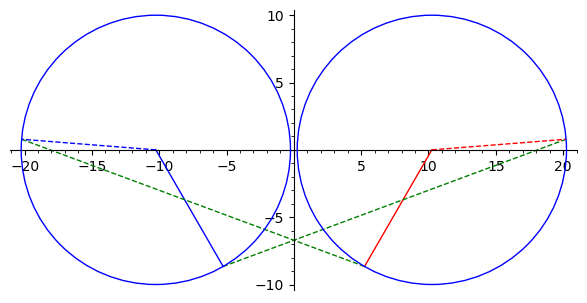

(-0.0057943638321845785, 0.00021960057145728917, -0.00021960057145729048)

In [5]:
calc_sum_Fy_t(N = 1, S = get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = T/3,
              omega = get_omega_d(v_c),
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0),
              to_animate=True, to_log = True)

In [6]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-07,
                 'epsrel' : 1.0e-07,
                 'limit'  : 100 }

nquad_opts_3 = { 'epsabs' : 1.0e-01,
                 'epsrel' : 1.0e-03,
                 'limit'  : 100 }
 
#nquad_opts = { 'epsabs' : 1.49e-07,
#               'epsrel' : 1.49e-07,
#               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [7]:
t_fy = []
t_f_alpha_l = []
t_f_alpha_r = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i,
                        omega = get_omega_d(v_c), to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans[0])]
    t_f_alpha_l += [(i/time_steps_number, ans[1])]
    t_f_alpha_r += [(i/time_steps_number, ans[2])]

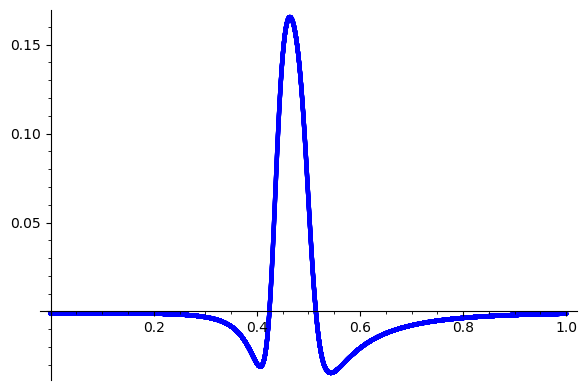

In [8]:
list_plot(t_fy)

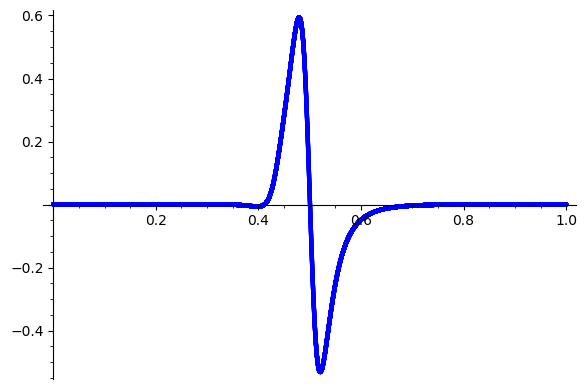

In [9]:
list_plot(t_f_alpha_l)

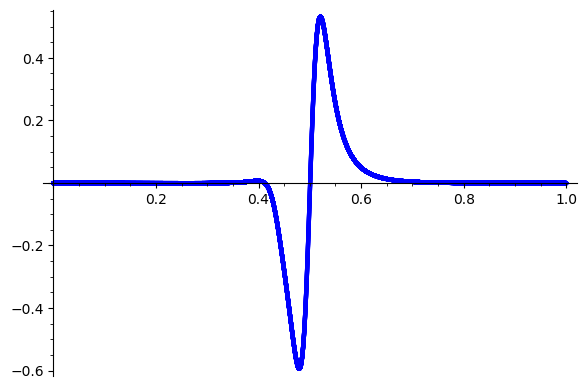

In [10]:
list_plot(t_f_alpha_r)

In [11]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

0.19968991436058964624

In [12]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

0.0025425309564868081062

In [13]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[0], 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(0.1996899143605675, 4.8256304570472795e-11)

In [14]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
ans[0] / T

0.0025425309564865259873

In [15]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
# суть работа в тещение одного периода, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
sum_A_alpha_l = 0
dl_alpha = dt * get_omega_d(v_c) * get_R_l()
for (t_i, f) in t_f_alpha_l:
    sum_A_alpha_l += f * dl_alpha
sum_A_alpha_l

-0.059692072325311957563

In [16]:
# интегральная сумма угловой компоненты силы, приложенной к зарядам левого колеса, по периоду отнесённая к периоду
# суть мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной

sum_A_alpha_l / T

-0.00076002306991778607923

In [17]:
# интеграл угловой компоненты силы, приложенной к зарядам левого колеса, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t,
                  omega = get_omega_d(v_c), to_animate=False)[1], 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(-0.07461509040667647, 5.1692843673831066e-09)

In [18]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённый к периоду
# мощность, затрачиваемая двигателем на поддержание угловой скорости колеса постоянной
ans[0]/T * get_omega_d(v_c) * get_R_l()

-0.0007600230699181580943

In [19]:
round_R = float(round(R))
round_R

62.0

In [20]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(-round_R, +round_R, 40*2)
ya_linspace = np.linspace(-round_R, +round_R, 40*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
rlw_ = ya_grid * np.nan
s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan
ay_ = ya_grid * np.nan
am_ = ya_grid * np.nan
an_ = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max

t_cur = 7.5
q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        Rlw = R_lw(Xa, Ya, Za, t_cur, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        rlw_[iy][ix] = Rlw

        #(E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_cur, q)
        # The Poynting vector S is defined as to be equal
        # to the cross product (1/μ)E × B
        #S_x = E_y * B_z - E_z * B_y
        #S_y = E_z * B_x - E_x * B_z
        #S_z = E_x * B_y - E_y * B_x
        #sx_[iy][ix] = S_x
        #sy_[iy][ix] = S_y
        #sz_[iy][ix] = S_z
        
        (Al_x, Al_y, Al_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        (Ar_x, Ar_y, Ar_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        ax_[iy][ix] = Al_x + Ar_x
        ay_[iy][ix] = Al_y + Ar_y
        am_[iy][ix] = sqrt((Al_x + Ar_x)^2 + (Al_y + Ar_y)^2)
        an_[iy][ix] = atan2((Al_y + Ar_y),(Al_x + Ar_x))

        #if sx_min > S_x:
        #    sx_min = S_x
        #if sx_max < S_x:
        #    sx_max = S_x        

        #if sy_min > S_y:
        #    sy_min = S_y
        #if sy_max < S_y:
        #    sy_max = S_y


        #u_[iy][ix] = E_x
        #v_[iy][ix] = E_y
        #e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        #t2 = t_lag(Xa, Ya, 0, t_cur)
        #t_[iy][ix] = t2


        phi_r = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega_d(v_c), alpha=0)
        phi_l = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega_d(v_c), alpha=0)
        s_[iy][ix] = phi_r+phi_l
        #bz_[iy][ix] = B_z
        #if bz_min > B_z:
        #    bz_min = B_z
        #if bz_max < B_z:
        #    bz_max = B_z

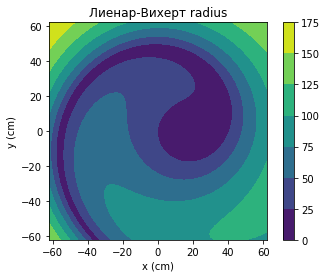

In [21]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, rlw_, levels = np.linspace(0, 32, 32/1+1))
cp = ax.contourf(xa_grid,ya_grid, rlw_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Лиенар-Вихерт radius')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

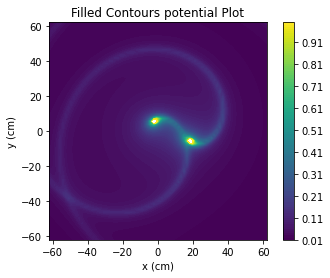

In [22]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, s_, levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours potential Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

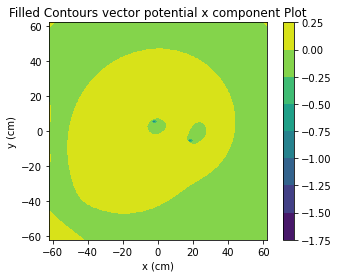

In [23]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ax_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential x component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

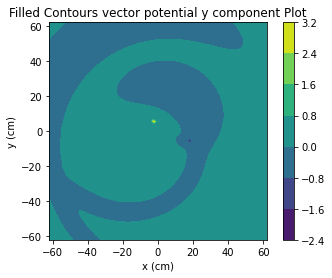

In [24]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, ay_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential y component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

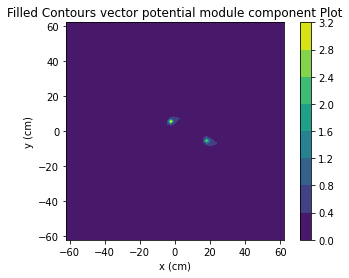

In [25]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, am_, levels = np.linspace(0.01, 0.5, int((1-0.01)/0.01+1)))
cp = ax.contourf(xa_grid,ya_grid, am_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential module component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

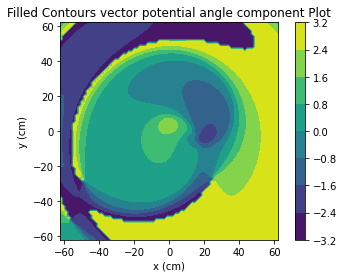

In [26]:
fig,ax=plt.subplots(1,1)
#cp = ax.contourf(xa_grid,ya_grid, an_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
cp = ax.contourf(xa_grid,ya_grid, an_)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential angle component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

In [27]:
# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
spherical_calc_Maxwells_stress_tensor = lambda r, theta, varphi, t : \
    calc_Maxwells_stress_tensor(X_a = r*sin(theta)*cos(varphi),
                                Y_a = r*cos(theta),
                                Z_a = r*sin(theta)*sin(varphi),
                                t_i = t,
                                N = 1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(),
                                cos_nx = - sin(theta)*cos(varphi),
                                cos_ny = - cos(theta),
                                cos_nz = - sin(theta)*sin(varphi),
                                omega = get_omega_d(v_c))

# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

In [28]:
spherical_calc_Maxwells_stress_tensor(r=R, theta=pi/2, varphi=0, t=T/3)

-7.384836939112499e-10

In [29]:
spherical_calc_Maxwells_stress_tensor(r=R, theta=pi/2, varphi=0, t=T/4)

2.7052297387918806e-09

In [30]:
spherical_calc_Maxwells_stress_tensor_R_t = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [31]:
spherical_calc_Maxwells_stress_tensor_R_t(theta=pi/2, varphi=0, t=T/3)

-2.79312995129582e-6

In [32]:
spherical_calc_Maxwells_stress_tensor_R_t(theta=pi/2, varphi=0, t=T/4)

0.0000102318551795456

In [33]:
stress_tensor_upper_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [34]:
stress_tensor_down_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [35]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [36]:
T = np.float128(2*pi)/get_omega_d(v_c) # период вращения
time_steps_number = 360                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [37]:
t_py = []
t_py_up = []
t_py_dw = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans_dw = stress_tensor_down_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_dw)
    
    ans_up = stress_tensor_upper_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_up)
    
    print(i, (i/time_steps_number).n(), t_i, ans_up[0]+ans_dw[0])
    t_py_up += [(i/time_steps_number, ans_up[0])]
    t_py_dw += [(i/time_steps_number, ans_dw[0])]
    t_py += [(i/time_steps_number, ans_up[0]+ans_dw[0])]

0 0.000000000000000 0.0 (0.026583644724479046, 7.02308873058997e-08)
0 0.000000000000000 0.0 (-0.002522351546353546, 2.394422650570918e-10)
0 0.000000000000000 0.0 0.0240612931781255
1 0.00277777777777778 0.21816615649929117649 (0.025789359996710094, 9.504663782865617e-08)
1 0.00277777777777778 0.21816615649929117649 (-0.0025538092222506703, 4.125985731594445e-10)
1 0.00277777777777778 0.21816615649929117649 0.023235550774459424
2 0.00555555555555556 0.43633231299858235298 (0.025014639512221142, 9.945439836207739e-08)
2 0.00555555555555556 0.43633231299858235298 (-0.002586275342911192, 6.505726725226728e-10)
2 0.00555555555555556 0.43633231299858235298 0.02242836416930995
3 0.00833333333333333 0.65449846949787352944 (0.02425881519849529, 7.932436073970761e-08)
3 0.00833333333333333 0.65449846949787352944 (-0.0026197913448744543, 9.593276806892526e-10)
3 0.00833333333333333 0.65449846949787352944 0.021639023853620834
4 0.0111111111111111 0.87266462599716470596 (0.023521245418230963, 6.7

34 0.0944444444444444 7.4176493209759000007 (0.007414508791321679, 6.448826360015616e-08)
34 0.0944444444444444 7.4176493209759000007 (-0.004580416605518275, 1.0488229332645902e-09)
34 0.0944444444444444 7.4176493209759000007 0.0028340921858034046
35 0.0972222222222222 7.635815477475191177 (0.007010671091872119, 9.361326051935282e-08)
35 0.0972222222222222 7.635815477475191177 (-0.0046964500376250025, 1.5306857294736555e-09)
35 0.0972222222222222 7.635815477475191177 0.0023142210542471163
36 0.100000000000000 7.8539816339744823537 (0.006611584926014727, 7.550936464593636e-08)
36 0.100000000000000 7.8539816339744823537 (-0.004818384080498166, 2.2345065475974987e-09)
36 0.100000000000000 7.8539816339744823537 0.0017932008455165613
37 0.102777777777778 8.07214779047377353 (0.006216925468532298, 8.062687351700275e-08)
37 0.102777777777778 8.07214779047377353 (-0.00494665323637878, 8.588153225186845e-08)
37 0.102777777777778 8.07214779047377353 0.001270272232153518
38 0.105555555555556 8.29

68 0.188888888888889 14.835298641951800001 (0.002057284409872897, 9.317361758106007e-08)
68 0.188888888888889 14.835298641951800001 (-0.02547487757499188, 9.580959296323069e-08)
68 0.188888888888889 14.835298641951800001 -0.023417593165118985
69 0.191666666666667 15.0534647984510911774 (0.0021564028562470815, 7.74259808480478e-08)
69 0.191666666666667 15.0534647984510911774 (-0.027104341109665937, 4.736674808259486e-08)
69 0.191666666666667 15.0534647984510911774 -0.024947938253418855
70 0.194444444444444 15.271630954950382354 (0.0022052232056041813, 7.326391820214312e-08)
70 0.194444444444444 15.271630954950382354 (-0.028783915353168845, 6.590510492725243e-08)
70 0.194444444444444 15.271630954950382354 -0.026578692147564663
71 0.197222222222222 15.4897971114496735305 (0.0022253773706225064, 4.0208554211061575e-08)
71 0.197222222222222 15.4897971114496735305 (-0.030544483785535585, 9.135913382194714e-08)
71 0.197222222222222 15.4897971114496735305 -0.02831910641491308
72 0.200000000000

102 0.283333333333333 22.252947962927700002 (0.0019822448559763685, 6.452025309811606e-08)
102 0.283333333333333 22.252947962927700002 (-2.85641786821842, 8.017486709255284e-10)
102 0.283333333333333 22.252947962927700002 -2.8544356233624435
103 0.286111111111111 22.471114119426991178 (0.001980893066194921, 7.789563440161828e-08)
103 0.286111111111111 22.471114119426991178 (-2.7477136445757204, 2.3084139489791718e-09)
103 0.286111111111111 22.471114119426991178 -2.7457327515095256
104 0.288888888888889 22.689280275926282354 (0.001980014306299967, 8.76675037297032e-16)
104 0.288888888888889 22.689280275926282354 (-2.291762296549489, 9.074429779820647e-08)
104 0.288888888888889 22.689280275926282354 -2.289782282243189
105 0.291666666666667 22.907446432425573532 (0.001979610199788917, 2.6804181591827983e-15)
105 0.291666666666667 22.907446432425573532 (-1.7211178591600969, 8.612552569037257e-08)
105 0.291666666666667 22.907446432425573532 -1.719138248960308
106 0.294444444444444 23.125612

136 0.377777777777778 29.670597283903600003 (0.0022708150821087814, 4.494054614625289e-08)
136 0.377777777777778 29.670597283903600003 (-0.011709580611340052, 9.654866474837114e-08)
136 0.377777777777778 29.670597283903600003 -0.009438765529231272
137 0.380555555555556 29.888763440402891179 (0.0022955862201695697, 9.400808446893076e-08)
137 0.380555555555556 29.888763440402891179 (-0.010356244439380437, 7.647017104275856e-08)
137 0.380555555555556 29.888763440402891179 -0.008060658219210867
138 0.383333333333333 30.106929596902182355 (0.00232213027115424, 9.538630169033652e-08)
138 0.383333333333333 30.106929596902182355 (-0.009088355850908583, 8.579660830735063e-08)
138 0.383333333333333 30.106929596902182355 -0.0067662255797543425
139 0.386111111111111 30.325095753401473533 (0.0023506700821489803, 1.2284513791491598e-08)
139 0.386111111111111 30.325095753401473533 (-0.007897822874239225, 4.727619196492977e-08)
139 0.386111111111111 30.325095753401473533 -0.005547152792090245
140 0.38

169 0.469444444444444 36.870080448380208826 (-0.0035657243410632533, 8.665141216310477e-08)
169 0.469444444444444 36.870080448380208826 0.016121422840846264
170 0.472222222222222 37.088246604879500003 (0.020187167777480433, 9.500011075527526e-08)
170 0.472222222222222 37.088246604879500003 (-0.0035199836411238753, 9.700318002814478e-08)
170 0.472222222222222 37.088246604879500003 0.01666718413635656
171 0.475000000000000 37.30641276137879118 (0.020683757342395085, 9.709133912952014e-08)
171 0.475000000000000 37.30641276137879118 (-0.003472797082949712, 6.185954627293769e-08)
171 0.475000000000000 37.30641276137879118 0.017210960259445372
172 0.477777777777778 37.524578917878082356 (0.021177868428762, 7.775322476496987e-08)
172 0.477777777777778 37.524578917878082356 (-0.0034247480747729717, 8.709391345082687e-08)
172 0.477777777777778 37.524578917878082356 0.01775312035398903
173 0.480555555555556 37.742745074377373533 (0.02167029322376225, 9.718078968759189e-08)
173 0.480555555555556 

203 0.563888888888889 44.287729769356108826 (0.03721732362167063, 9.791300154143065e-08)
203 0.563888888888889 44.287729769356108826 (-0.0022737309567404697, 7.875626229840764e-11)
203 0.563888888888889 44.287729769356108826 0.03494359266493016
204 0.566666666666667 44.505895925855400004 (0.03778468752445825, 9.450055733153169e-08)
204 0.566666666666667 44.505895925855400004 (-0.002249997716741207, 6.248605927701413e-11)
204 0.566666666666667 44.505895925855400004 0.03553468980771705
205 0.569444444444444 44.724062082354691182 (0.038356145487035906, 9.892523823113526e-08)
205 0.569444444444444 44.724062082354691182 (-0.0022269270947451484, 4.983061236234165e-11)
205 0.569444444444444 44.724062082354691182 0.03612921839229076
206 0.572222222222222 44.942228238853982356 (0.038931781065244704, 9.916912458070708e-08)
206 0.572222222222222 44.942228238853982356 (-0.002204500967651629, 5.68295965715808e-08)
206 0.572222222222222 44.942228238853982356 0.036727280097593074
207 0.57500000000000

237 0.658333333333333 51.705379090332008827 (0.05950909098272633, 9.803409170409429e-08)
237 0.658333333333333 51.705379090332008827 (-0.0017521579185786453, 1.1287272957335054e-08)
237 0.658333333333333 51.705379090332008827 0.057756933064147684
238 0.661111111111111 51.923545246831300005 (0.060291959792756984, 8.655697950089045e-08)
238 0.661111111111111 51.923545246831300005 (-0.001743540344213959, 1.0789799066013425e-08)
238 0.661111111111111 51.923545246831300005 0.058548419448543026
239 0.663888888888889 52.141711403330591183 (0.06108502376653533, 9.098254810638847e-08)
239 0.663888888888889 52.141711403330591183 (-0.0017352114585745236, 1.0025010667461746e-08)
239 0.663888888888889 52.141711403330591183 0.059349812307960804
240 0.666666666666667 52.359877559829882357 (0.061888631386312495, 9.415396268657445e-08)
240 0.666666666666667 52.359877559829882357 (-0.0017271658405285516, 9.077010977113364e-09)
240 0.666666666666667 52.359877559829882357 0.06016146554578394
241 0.6694444

271 0.752777777777778 59.123028411307908828 (0.09473616665719511, 7.581431694220729e-08)
271 0.752777777777778 59.123028411307908828 (-0.0015969026826336695, 2.0702684127416693e-10)
271 0.752777777777778 59.123028411307908828 0.09313926397456145
272 0.755555555555556 59.341194567807200005 (0.09616084450772669, 9.448763923582007e-08)
272 0.755555555555556 59.341194567807200005 (-0.0015960760671455787, 1.6623916652630326e-10)
272 0.755555555555556 59.341194567807200005 0.0945647684405811
273 0.758333333333333 59.55936072430649118 (0.09761455964377755, 7.658812262246518e-08)
273 0.758333333333333 59.55936072430649118 (-0.001595442867683831, 1.2956756343933456e-10)
273 0.758333333333333 59.55936072430649118 0.09601911677609372
274 0.761111111111111 59.777526880805782358 (0.09909726255778872, 7.791017948610173e-08)
274 0.761111111111111 59.777526880805782358 (-0.0015950024228840584, 9.741262987121243e-11)
274 0.761111111111111 59.777526880805782358 0.09750226013490466
275 0.763888888888889 

305 0.847222222222222 66.54067773228380883 (0.35545973351758786, 9.206601346177165e-08)
305 0.847222222222222 66.54067773228380883 (-0.001678013681615437, 1.476857229484219e-12)
305 0.847222222222222 66.54067773228380883 0.3537817198359724
306 0.850000000000000 66.7588438887831 (0.28086335099842946, 9.868875917794365e-08)
306 0.850000000000000 66.7588438887831 (-0.001684001991208493, 7.671636114312146e-13)
306 0.850000000000000 66.7588438887831 0.27917934900722097
307 0.852777777777778 66.97701004528239118 (0.2283180995540909, 8.719215285717119e-08)
307 0.852777777777778 66.97701004528239118 (-0.0016902201677286945, 2.783532791278039e-13)
307 0.852777777777778 66.97701004528239118 0.22662787938636222
308 0.855555555555556 67.19517620178168236 (0.19233136818994703, 9.929610956258342e-08)
308 0.855555555555556 67.19517620178168236 (-0.0016966714504804761, 1.581949516645808e-14)
308 0.855555555555556 67.19517620178168236 0.19063469673946656
309 0.858333333333333 67.413342358280973536 (0.1

339 0.941666666666667 73.95832705325970883 (0.04936925400614542, 8.154827107456544e-08)
339 0.941666666666667 73.95832705325970883 (-0.002039548741239233, 9.604964197095663e-14)
339 0.941666666666667 73.95832705325970883 0.04732970526490619
340 0.944444444444444 74.17649320975900001 (0.04793702062949056, 6.06363493967023e-08)
340 0.944444444444444 74.17649320975900001 (-0.002056511926135137, 2.957014293713693e-13)
340 0.944444444444444 74.17649320975900001 0.04588050870335542
341 0.947222222222222 74.394659366258291185 (0.04654923962424581, 6.305185471476571e-08)
341 0.947222222222222 74.394659366258291185 (-0.0020739598212313986, 1.2750044345014895e-12)
341 0.947222222222222 74.394659366258291185 0.04447527980301441
342 0.950000000000000 74.61282552275758236 (0.045203958017599515, 9.25410056226852e-08)
342 0.950000000000000 74.61282552275758236 (-0.0020919072759439414, 2.938638721568926e-12)
342 0.950000000000000 74.61282552275758236 0.043112050741655576
343 0.952777777777778 74.83099

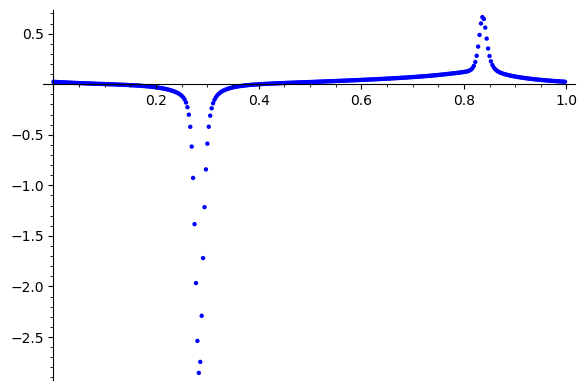

In [38]:
list_plot(t_py)

In [39]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

-1.722266683872469843

In [40]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

-0.021928580484863220659

In [41]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

0.0025425309564868081062

In [48]:
sum_py/sum_fy

-8.624705405814789282

In [42]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

-5.619810353692276826

In [43]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

-0.071553647762331088135

In [44]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

3.8975436698198071119

In [45]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

0.049625067277467869123

In [46]:
spherical_calc_Maxwells_stress_tensor_R = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [47]:
# "upper\\,half\\,sphere"

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts_3)
#                theta                  varphi                   t

TypeError: _home_drozole__sage_temp_caea0a7c0970_31835_tmp__2zgdbjz_pyx_0.get_omega_d() takes exactly one argument (0 given)

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere

In [ ]:
# "down\\,half\\,sphere"

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere + Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

In [ ]:
calc_sum_Fy_t(N=1, S=S, R_l=R_l, R_r=R_r, t_i = 1)